In [18]:
import pandas as pd
from Models.GAT_Transformer import TransformerDecoder

/home/liangaoming/miniconda3/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Using device: cuda


In [19]:
import os
import sys

In [20]:
directory_path = os.path.dirname(os.getcwd())
# Optionally, print all paths to confirm the addition
for path in sys.path:
    print("Import path:", path)

Import path: /home/liangaoming/dashuai/gust_test-main
Import path: /home/liangaoming/miniconda3/lib/python313.zip
Import path: /home/liangaoming/miniconda3/lib/python3.13
Import path: /home/liangaoming/miniconda3/lib/python3.13/lib-dynload
Import path: 
Import path: /home/liangaoming/.local/lib/python3.13/site-packages
Import path: /home/liangaoming/miniconda3/lib/python3.13/site-packages
Import path: /home/liangaoming/dashuai/gust_test-main/Models
Import path: /tmp/tmpj41v4xk7


In [21]:
sys.path.insert(0, "/home/liangaoming/dashuai/gust_test-main") #please add your path case by case linux or wins
# 添加 Models 文件夹路径到 sys.path
sys.path.append('/home/liangaoming/dashuai/gust_test-main/Models')

In [23]:

yaml_path = "/home/liangaoming/dashuai/gust_test-main/Checkpoints/simu2d_forward/config.yaml"
import yaml
# 打开并读取 YAML 文件
with open(yaml_path, 'r') as file:
    set_dict = yaml.safe_load(file)
model_path = "/home/liangaoming/dashuai/gust_test-main/Checkpoints/simu2d_forward/best_model.pth"
model = TransformerDecoder(**set_dict["Model"]["details"])
paras = torch.load(model_path)
model.load_state_dict(paras)
# 切换到评估模式
model.eval()

TransformerDecoder(
  (embedding): Linear(in_features=9, out_features=20, bias=True)
  (layers): ModuleList(
    (0-3): 4 x TransformerDecoderLayer(
      (self_attn): MultiheadAttention(
        (out_proj): NonDynamicallyQuantizableLinear(in_features=20, out_features=20, bias=True)
      )
      (norm1): LayerNorm((20,), eps=1e-05, elementwise_affine=True)
      (graph_attn): GraphAttentionLayer(
        (gat): GATConv(20, 5, heads=4)
      )
      (norm2): LayerNorm((20,), eps=1e-05, elementwise_affine=True)
      (ffn): Sequential(
        (0): Linear(in_features=21, out_features=80, bias=True)
        (1): ReLU()
        (2): Linear(in_features=80, out_features=20, bias=True)
      )
      (norm3): LayerNorm((20,), eps=1e-05, elementwise_affine=True)
    )
  )
  (output_layer): Linear(in_features=20, out_features=1, bias=True)
)

In [24]:
dataset_csv = "/home/liangaoming/dashuai/gust_test-main/Dataset/Simulations/naca0012_gust_209.csv"

In [25]:
read = pd.read_csv(f"{dataset_csv}")

In [26]:
read

,Case,CL,CD,Cp_1,Cp_2,Cp_3,Cp_4,Cp_5,Cp_6,Cp_7,Cp_8,Cp_9
0,AOA_-6_GUST_0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,AOA_-6_GUST_0,-0.012269,0.036082,-0.179473,-0.299470,-0.436463,-0.145501,0.906231,-0.123692,-0.406960,-0.303109,-0.188334
2,AOA_-6_GUST_0,-0.010833,0.032010,-0.188335,-0.308106,-0.443359,-0.160617,0.866360,-0.143679,-0.422494,-0.310701,-0.188133
3,AOA_-6_GUST_0,-0.010547,0.031499,-0.181817,-0.311695,-0.449118,-0.162255,0.856444,-0.145400,-0.427483,-0.317549,-0.181613
4,AOA_-6_GUST_0,-0.009193,0.031778,-0.181666,-0.326418,-0.445661,-0.162199,0.851710,-0.144777,-0.423042,-0.332532,-0.181047
...,...,...,...,...,...,...,...,...,...,...,...,...
55171,AOA_30_GUST_20,1.198921,0.497489,-1.121556,-0.899644,-1.260399,-1.563450,0.573826,1.050604,0.544571,0.141421,-0.203193
55172,AOA_30_GUST_20,1.219558,0.505009,-1.156340,-0.928029,-1.252723,-1.546736,0.580083,1.055612,0.549741,0.147234,-0.193234
55173,AOA_30_GUST_20,1.250151,0.513660,-1.199141,-0.954096,-1.252635,-1.540192,0.580450,1.058484,0.555986,0.157939,-0.170282
55174,AOA_30_GUST_20,1.295781,0.526210,-1.256843,-0.974371,-1.258743,-1.543159,0.579061,1.064949,0.568421,0.177533,-0.132517


In [27]:
read.shape

(55176, 12)

In [28]:
import torch
dataset_path = "/home/liangaoming/dashuai/gust_test-main/Dataset/Simulations/Sim_no_aug_sec_3_1.pt"
test_dataset = torch.load(dataset_path,weights_only=False)
tensorset = test_dataset["test_dataset"]

In [32]:
from torch.utils.data import DataLoader
test_loader = DataLoader(tensorset, batch_size = 30, shuffle=True)

In [33]:
for data,adj,truth in test_loader:
   test_tensor = truth
   print(truth.shape)
   break

torch.Size([20, 250, 1])


In [34]:
import pandas as pd
import numpy as np
import re

# 假设你已经有 read 数据
# read = pd.read_csv(...)  # 你已经完成了这一步

# --- 提取 AOA 和 GUST ---
def parse_case(case_str):
    match = re.match(r"AOA_(-?\d+)_GUST_(\d+)", case_str)
    if match:
        return int(match.group(1)), int(match.group(2))
    else:
        raise ValueError(f"Bad case name: {case_str}")

read['AOA'], read['GUST'] = zip(*read['Case'].map(parse_case))

# --- 找到所有唯一的 (AOA, GUST) 对 ---
unique_cases = read[['Case', 'AOA', 'GUST']].drop_duplicates()



In [36]:
import torch
import numpy as np
import torch.nn as nn


# 所有 unique cases in read
unique_cases = read[['AOA', 'GUST']].drop_duplicates().reset_index(drop=True)
# --- 初始化结果张量 ---
cl_tensor = test_tensor.numpy()
# 储存匹配结果
matched_cases = []

# 遍历 cl_tensor 中的每一条序列
for i in range(cl_tensor.shape[0]):
    cl_seq = cl_tensor[i, :, 0] # shape = [250]
    
    found = False
    for _, row in unique_cases.iterrows():
        aoa, gust = row['AOA'], row['GUST']
        subset = read[(read['AOA'] == aoa) & (read['GUST'] == gust)]
        
        if len(subset) < 264:
            continue  # skip invalid case
        
        cl_candidate = subset.iloc[14:264]['CL'].values  # shape = [250]
        
        # 对比是否一致（可容许微小误差）
        if np.allclose(cl_seq, cl_candidate, atol=1e-5):
            matched_cases.append((aoa, gust))
            found = True
            break
    
    if not found:
        matched_cases.append(None)
        print(f"❌ Case {i} not matched!")

# 查看结果
mse_loss_fn = torch.nn.MSELoss(reduction='mean')

for batch_idx, (data, adj, truth) in enumerate(test_loader):
    adj = adj[0,:,:]
    test_out = model(data, adj)  # 假设这是你的模型 forward
    B = truth.size(0)

    for i in range(B):
        aoa, gust = matched_cases[i]
        pred_i = test_out[i]     # [250, 1]
        truth_i = truth[i]       # [250, 1]
        mse_loss = mse_loss_fn(pred_i, truth_i)

        print(f"[Batch {batch_idx} | Sample {i}] ↔ AOA={aoa}, GUST={gust} → MSE={mse_loss.item():.6f}")

    


[Batch 0 | Sample 0] ↔ AOA=-6, GUST=4 → MSE=0.001959
[Batch 0 | Sample 1] ↔ AOA=28, GUST=2 → MSE=0.000718
[Batch 0 | Sample 2] ↔ AOA=6, GUST=0 → MSE=0.000068
[Batch 0 | Sample 3] ↔ AOA=12, GUST=20 → MSE=0.000471
[Batch 0 | Sample 4] ↔ AOA=-4, GUST=12 → MSE=0.000894
[Batch 0 | Sample 5] ↔ AOA=22, GUST=6 → MSE=0.000069
[Batch 0 | Sample 6] ↔ AOA=2, GUST=6 → MSE=0.000092
[Batch 0 | Sample 7] ↔ AOA=-6, GUST=18 → MSE=0.000265
[Batch 0 | Sample 8] ↔ AOA=20, GUST=16 → MSE=0.000171
[Batch 0 | Sample 9] ↔ AOA=18, GUST=12 → MSE=0.000972
[Batch 0 | Sample 10] ↔ AOA=14, GUST=8 → MSE=0.000263
[Batch 0 | Sample 11] ↔ AOA=18, GUST=2 → MSE=0.001212
[Batch 0 | Sample 12] ↔ AOA=28, GUST=0 → MSE=0.000096
[Batch 0 | Sample 13] ↔ AOA=-2, GUST=10 → MSE=0.006789
[Batch 0 | Sample 14] ↔ AOA=30, GUST=8 → MSE=0.000636
[Batch 0 | Sample 15] ↔ AOA=4, GUST=12 → MSE=0.000201
[Batch 0 | Sample 16] ↔ AOA=24, GUST=16 → MSE=0.002299
[Batch 0 | Sample 17] ↔ AOA=4, GUST=8 → MSE=0.000478
[Batch 0 | Sample 18] ↔ AOA=0, GUS

In [39]:
# 将 MSE 值输入
mse_list = [
    0.001959, 0.000718, 0.000068, 0.000471, 0.000894,
    0.000069, 0.000092, 0.000265, 0.000171, 0.000972,
    0.000263, 0.001212, 0.000096, 0.006789, 0.000636,
    0.000201, 0.002299, 0.000478, 0.000803, 0.000246
]

# 计算平均
mean_mse = sum(mse_list) / len(mse_list)
mean_mse


0.0009351

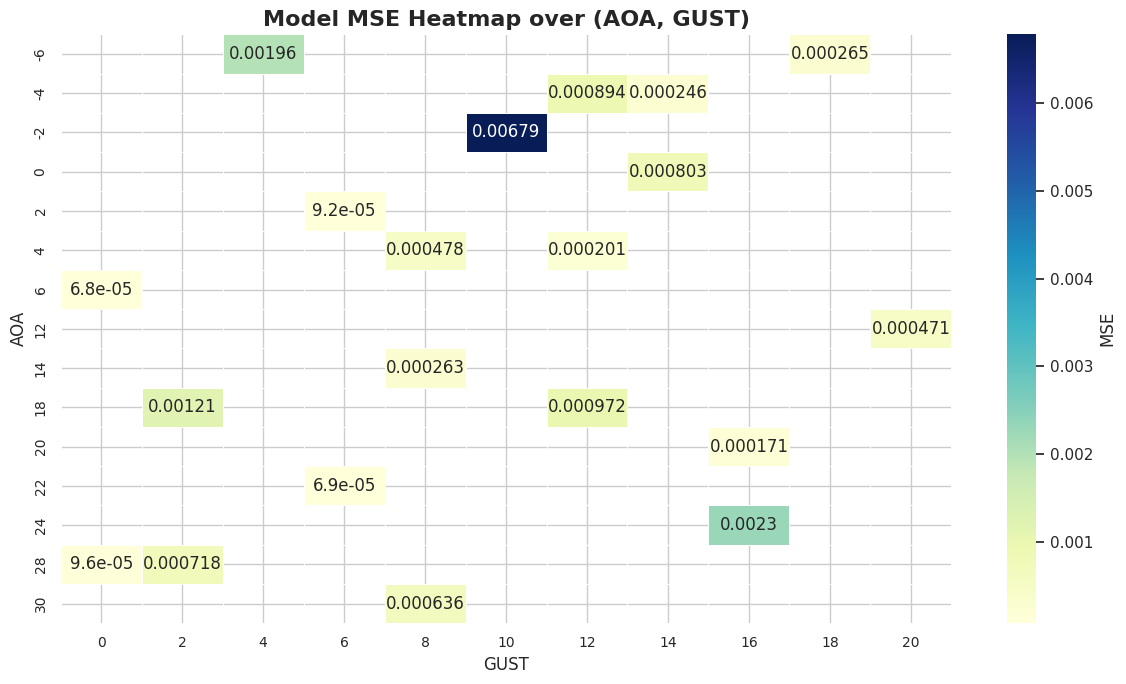

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 准备数据
aoa_list = [-6, 28, 6, 12, -4, 22, 2, -6, 20, 18, 14, 18, 28, -2, 30, 4, 24, 4, 0, -4]
gust_list = [4, 2, 0, 20, 12, 6, 6, 18, 16, 12, 8, 2, 0, 10, 8, 12, 16, 8, 14, 14]
mse_list = [0.001959, 0.000718, 0.000068, 0.000471, 0.000894, 0.000069, 0.000092,
            0.000265, 0.000171, 0.000972, 0.000263, 0.001212, 0.000096, 0.006789,
            0.000636, 0.000201, 0.002299, 0.000478, 0.000803, 0.000246]

# 构建热力图矩阵
aoa_unique = sorted(set(aoa_list))
gust_unique = sorted(set(gust_list))
heatmap = np.full((len(aoa_unique), len(gust_unique)), np.nan)

for aoa, gust, mse in zip(aoa_list, gust_list, mse_list):
    i = aoa_unique.index(aoa)
    j = gust_unique.index(gust)
    heatmap[i, j] = mse

# 设置画图风格
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 7))

# 更美观的热力图
ax = sns.heatmap(
    heatmap,
    annot=True,
    fmt=".3g",
    cmap="YlGnBu",
    linewidths=0.5,
    linecolor='white',
    xticklabels=gust_unique,
    yticklabels=aoa_unique,
    cbar_kws={'label': 'MSE'}
)

plt.title("Model MSE Heatmap over (AOA, GUST)", fontsize=16, weight='bold')
plt.xlabel("GUST", fontsize=12)
plt.ylabel("AOA", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()
